In [1]:
%matplotlib notebook

In [2]:
from random import randint
from IPython import display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [3]:
def Curva(r = 10):
    X = []
    Y = []
    for x in np.arange(-r,r+1, 0.1):
        y = np.sin(x)
        Y.append(y)
        X.append(x)
    return X, Y

In [30]:
plt.close()

<IPython.core.display.Javascript object>


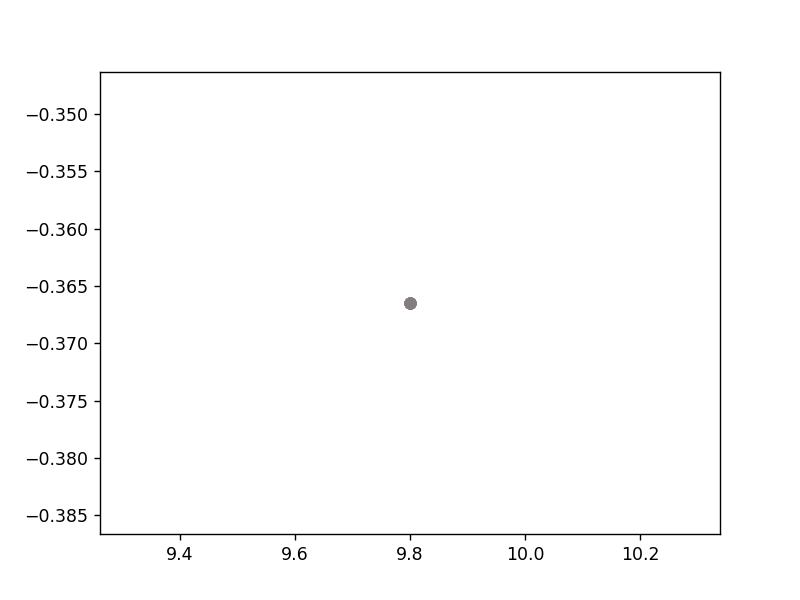

In [106]:
# create empty lists for the x and y data
x = []
y = []

# create the figure and axes objects
fig = plt.figure()

long = np.arange(-10, 10, 0.2)
nFrames = long.shape[0]

PastPos = (-10, np.sin(-10))
e = 0.00001
PastDer = None

def animate(i):
    #plt.scatter(PastPos)
    try:
        global PastPos, PastDer
        plt.clf()
        X, Y = Curva(10)
        plt.plot(X, Y, color = "k")
        # ======== Plotteando ========
        x = long[i]
        y = np.sin(x)
        plt.scatter(x, y, color = "b")
        plt.scatter(PastPos[0], PastPos[1], color = "b")

        # ======= Derivada actual =========
        #ActDer

        h = (x - PastPos[0])
        #y' = ( f(x) - f(x - h) / h
        PrimDer = (y - PastPos[1]) / h
        #print(f"Derivada calculada: {PrimDer} - Real: {np.cos(x)}")
        # y = f(x)
        # y'' = f(x - h) - 2f(x - h) + f(x) / h^2
        # h = xAct - xPast
        # y = PostAct 
        #SegDer = (PastPos[1] - 2*PastPos[1] + y)/(h**2)
        SegDer = 0
        if i != 1:
            SegDer = (PrimDer - PastDer)/h
            #print(f"Segunda Derivada calculada: {SegDer} - Real: {-np.sin(x)}")

        # ====== Actualizando los parámetros =======
        PastPos = (x, y)
        PastDer = PrimDer
        
    except:
        pass
    #return PrimDer, SegDer
    
ani = FuncAnimation(fig, animate, frames = nFrames, interval=50, repeat=False)
plt.show()

In [92]:
long = np.arange(-10, 10, 0.2)
nFrames = long.shape[0]

PastPos = (-10, np.sin(-10))
e = 0.00001
PastDer = None


In [97]:
def animate(i):
    #plt.scatter(PastPos)
    global PastPos, PastDer
    plt.clf()
    X, Y = Curva(10)
    plt.plot(X, Y, color = "k")
    # ======== Plotteando ========
    x = long[i]
    y = np.sin(x)
    plt.scatter(x, y, color = "b")
    plt.scatter(PastPos[0], PastPos[1], color = "b")
    
    # ======= Derivada actual =========
    #ActDer
    
    h = (x - PastPos[0])
    #y' = ( f(x) - f(x - h) / h
    PrimDer = (y - PastPos[1]) / h
    #print(f"Derivada calculada: {PrimDer} - Real: {np.cos(x)}")
    # y = f(x)
    # y'' = f(x - h) - 2f(x - h) + f(x) / h^2
    # h = xAct - xPast
    # y = PostAct 
    #SegDer = (PastPos[1] - 2*PastPos[1] + y)/(h**2)
    SegDer = 0
    if i != 1:
        SegDer = (PrimDer - PastDer)/h
        #print(f"Segunda Derivada calculada: {SegDer} - Real: {-np.sin(x)}")
    plt.scatter(PastPos[0], PastPos[1])
    plt.show()
    
    # ====== Actualizando los parámetros =======
    PastPos = (x, y)
    PastDer = PrimDer
    
    return [[PrimDer, np.cos(x)], [SegDer, -np.sin(x)]]

In [102]:
D = []
D_ = []
for i in range(1, 100):
    #animate(i)
    f = animate(i)
    D.append(f[0])
    D_.append(f[1])

<IPython.core.display.Javascript object>


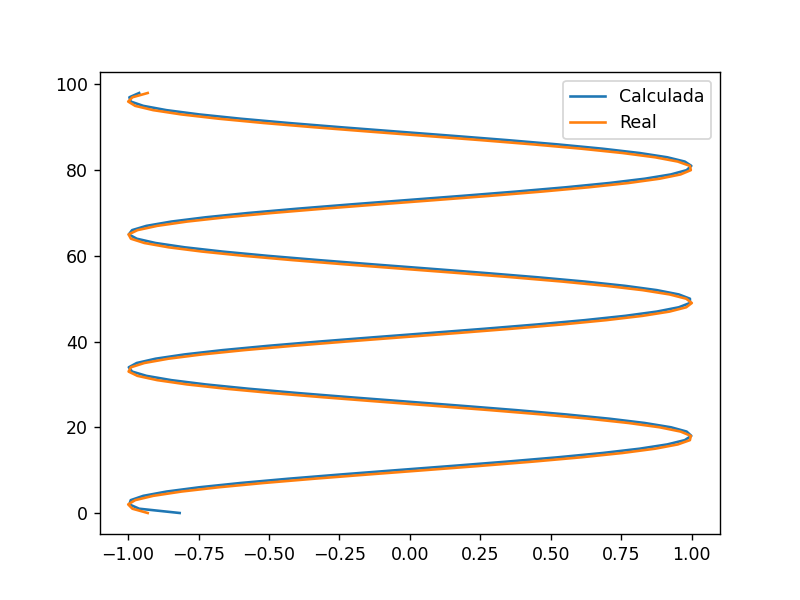

In [103]:
plt.close()
plt.plot(np.array(D).T[0], np.arange(len(D)), label = "Calculada")
plt.plot(np.array(D).T[1], np.arange(len(D)), label = "Real")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


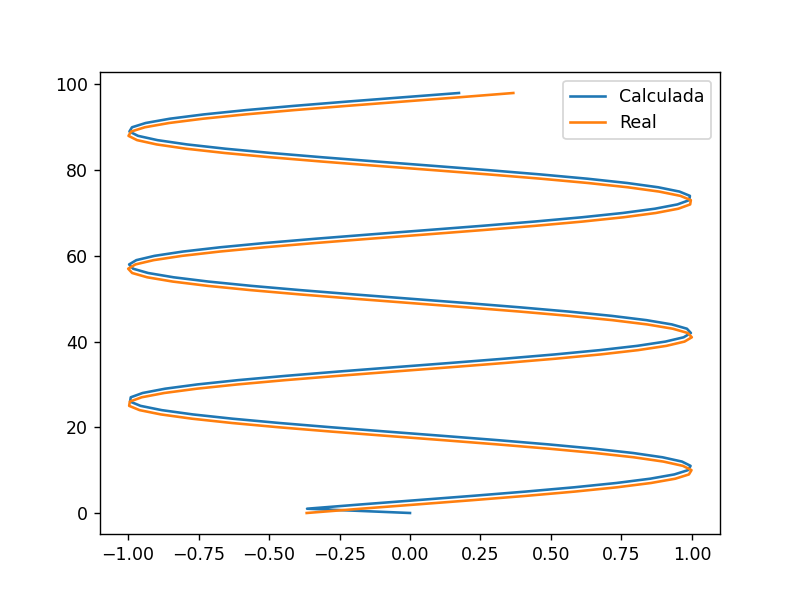

In [86]:
plt.close()
plt.plot(np.array(D_).T[0], np.arange(len(D_)), label = "Calculada")
plt.plot(np.array(D_).T[1], np.arange(len(D_)), label = "Real")
plt.legend()
plt.show()

## Modelo con la velocidad

In [ ]:

nFrames = long.shape[0]

PastPos = (-10, np.sin(-10))
e = 0.00001
PastDer = None

In [26]:
class Physics:
    
    def __init__(self, PosInicial):
        self.Pos = PosInicial
        self.PastPos = None
        self.PastDer = None
        self.PasVel = None
        
        self.TimeStep = 1
        self.long = np.arange(-10, 10, 0.2)
        
        
    def getFirstDerivate(self, Pos):
        """
        y' = ( f(x) - f(x - h) ) / h
        
        In:
        Pos [tuple] - Posicion actual (x,y)
        
        Out:
        Derivada [float] - derivada en ese punto
        """
        
        h = (Pos[0] - self.PastPos[0])
        
        return (Pos[1] - self.PastPos[1]) / h
    
    def getSecondDerivate(self, Pos):
        """
        y' = ( f'(x) - f'(x - h) ) / h
        
        In:
        Pos [tuple] - Posicion actual (x,y)
        
        Out:
        Derivada [float] - segunda derivada en ese punto
        """
        h = (Pos[0] - self.PastPos[0])
        
        return (self.getFirstDerivate(Pos) - self.PastDer) / h
        
    
    def Update(self, Vel, Direccion):
        """
        In:
        Direccion [tuple] - Posición actual (x,y)
        Vel [float] - Velocidad actual

        Out:
        NewPoss [tuple] - Posición actualizada (x,y)
        NewVel [float] - Velocidad actualizada
        """
        x, y = self.Pos
        Dirx, Diry = Direccion
        # ======= Derivadas =========
        PrimDer = None
        if self.TimeStep > 1 :    
            PrimDer = self.getFirstDerivate((x,y))
            
        if self.TimeStep > 2:
            SegDer = self.getSecondDerivate((x,y))
            
        # ======= Componentes de la posición =========
        alpha = np.arctan(Diry/Dirx)
        Vx = np.cos(alpha)
        Vy = np.sin(alpha)
        
        Diry = Diry + Vy
        Dirx = Dirx + Vx
        
        
        
        # ====== Actualizando los parámetros =======
        self.PastPos = (x, y)
        self.PastDer = PrimDer
        self.TimeStep += 1

In [27]:
P = Physics((0,0))

In [29]:
P.Update(10, (1,0))

ZeroDivisionError: division by zero

In [49]:
np.cos(np.arctan(1))

0.7071067811865476